In [25]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import interp1d
import seaborn as sns
from scipy.stats import linregress

import PythonGraphMod

$$\xi_{0c} = \frac{U}{I f}$$

In [26]:
# открваем файлы с данными, получаем файловые дескрипторы
low_f_df = pd.read_excel("../data/low_f.ods")
hight_f_df = pd.read_excel("../data/hight_f.ods")

# функция, вычисления кси (смотри формулу выше)
def kxi(U, I, f):
    return 1000*U/(I * f)

# импортируем эксперементальные данные в массивы
# низкие частоты
low_f = np.array(low_f_df['f, Гц']) # частота
low_U = np.array(low_f_df['U, В'])  # напряжение
low_I = np.array(low_f_df['I, мА']) # ток
low_kxi = kxi(low_U, low_I, low_f)  # кси

# высокие частоты
hight_f = np.array(hight_f_df['f, Гц']) # частота
hight_U = np.array(hight_f_df['U, В'])  # напряжение
hight_I = np.array(hight_f_df['I, мА']) # ток
Delta_Psi = np.array(hight_f_df['Delta_Psi']) # разность фаз
Psi_err = np.array(hight_f_df['Psi_err']) # погрешность разности фаз
hight_kxi = kxi(hight_U, hight_I, hight_f) # кси

# конкатенируем массивы, чтобы получить данные на всей области частот
# корень из частоты
sqrt_f = np.concatenate((np.sqrt(low_f), np.sqrt(hight_f[1:])), axis=0, out=None, dtype=None)
# квадрат частоты
sqr_f = np.concatenate((np.square(low_f), np.square(hight_f[1:])), axis=0, out=None, dtype=None)
# частота
f = np.concatenate((low_f, hight_f[1:]), axis=0, out=None, dtype=None)
# кси на всем диапазоне частот
kxi_region = np.concatenate((low_kxi, hight_kxi[1:]), axis=0, out=None, dtype=None)

Delta_Psi y0 = 0.750395
slope = 0.021446
slope stderr: 0.000305
intersept stderr: 0.037664


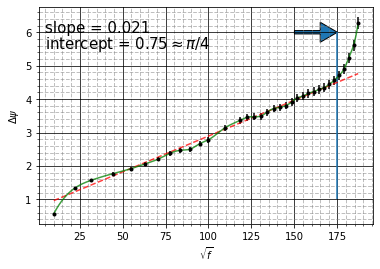

In [27]:

# построим график зависимости разности фаз от корня из частоты
# используем функцию линейной регрессии, выбросив заведомо нелинейные промежутки
lin_Psi = linregress(np.sqrt(hight_f[1:-5:1]), Delta_Psi[1:-5:1])

fig1, ax1 = PythonGraphMod.CreateSimpleGraph()

# наносим на график эксперементальные точки и погрешности
plt.errorbar(np.sqrt(hight_f), Delta_Psi, yerr=Psi_err, fmt='.', ecolor='black', color='black')
ax1.scatter(np.sqrt(hight_f), Delta_Psi, color='black', marker='o', s=2, alpha=1)
ax1.plot(np.sqrt(hight_f), lin_Psi.intercept + lin_Psi.slope * np.sqrt(hight_f), color='red', alpha=0.75, lw=1.5, ls='--')

# отладка, выводим значение наклона и пересечения с осью y
print('Delta_Psi y0 = %f' %lin_Psi.intercept)
print('slope = %f' %lin_Psi.slope)

# отладка, выводим значение ошибки наклона и стандартной ошибки пересечения с осью y
print('slope stderr: %f' %lin_Psi.stderr)
print('intersept stderr: %f' %lin_Psi.intercept_stderr)

# создаем массивы значений для интерполяции кривой 
sqrt_hf_dence, DPsi_dence = PythonGraphMod.InterpolateSet(np.sqrt(hight_f), Delta_Psi, 'cubic', 10, 187)
ax1.plot(sqrt_hf_dence, DPsi_dence, color='green', alpha=0.75, lw=1.5, ls='-')

# стрелочка
ax1.arrow(150, 6, 25, 0,
         length_includes_head = True,
         width = 0.1,
         head_width = 0.6,
         head_length = 10)
# вертикальная линия
# параметры: координата по x, y_min, y_max
ax1.vlines(175, 1, 6, ls='-')

# сетка
ax1.minorticks_on()
ax1.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax1.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
ax1.text(5, 6, 'slope = ' + str(round(lin_Psi.slope, 3)), size = 15)
ax1.text(5, 5.5, 'intercept = ' + str(round(lin_Psi.intercept, 3)) + r'$\approx \pi/4$', size = 15)
plt.ylabel(r'$\Delta \psi$')
plt.xlabel(r'$\sqrt{f}$')

fig1.savefig("../images/DeltaPsi.pdf")

Таким образом по полученной зависимости $$\Delta \psi = \frac{\pi}{4} + \frac{h \sqrt{\mu_0 \sigma \omega}}{\sqrt{2}}$$ можно определить проводимость меди. В нашем плучае $$\sigma = 5.178 \cdot 10^7$$
Проводимость меди так же можно расчитать по формуле $$H_1 = \frac{H_0}{\ch{\alpha h} + 0.5 \alpha a \sh{\alpha h}}$$ где $$\alpha = \frac{1 + i}{\delta}$$

y0 = 0.019083
intersept stderr: 0.000037


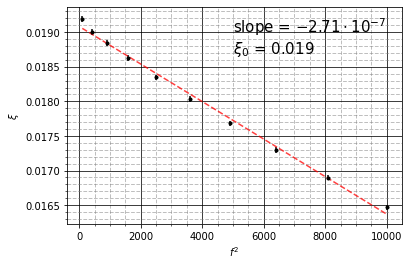

In [33]:
# справка: погрешность xi 0,22%
# построим график зависимости амплитуты (кси) от квадрата частоты в области низких частот
fig2, ax2 = PythonGraphMod.CreateSimpleGraph()

# воспрользуемся функцией линейной регрессии
lin_low_kxi = linregress(np.square(low_f), low_kxi)
# для удобства сделаем отдельный массив для значений оси y
kxi0c = lin_low_kxi.intercept + lin_low_kxi.slope * np.square(low_f)

# нанесем на график эксперементальные точки, погрешности и линейную зависимость
ax2.scatter(np.square(low_f), low_kxi, c = 'green', marker = 'o', s = 5)
ax2.plot(np.square(low_f), kxi0c, color='red', alpha=.75, lw=1.5, ls='--')
plt.errorbar(np.square(low_f), low_kxi, yerr=0.0022*kxi0c, fmt='.', ecolor='black', color='black')

# пересечение графика с осью y
kxi0 = lin_low_kxi.intercept
# отладка
print('y0 = %f' %kxi0)
print('intersept stderr: %f' %lin_low_kxi.intercept_stderr)

# сетка
ax2.minorticks_on()
ax2.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax2.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
ax2.text(5000, 0.019, r'slope = $-2.71 \cdot 10^{-7}$', size = 15)
ax2.text(5000, 0.0187, r'$\xi_0$ = ' + str(round(lin_low_kxi.intercept, 3)), size = 15)
plt.ylabel(r'$\xi$')
plt.xlabel(r'$f^2$')
plt.show()

fig2.set_figheight(6)
fig2.set_figwidth(8)
fig2.savefig("../images/xi0c(1).pdf")

Построили зависимость $$\xi_{0c}(\nu^2)$$ на низких частотах. По точке пересечения с осью ординат определили $$\xi_0 = 0.019083$$ амплитуду внешнего поля.

Далее, коэффициент ослабления магнитного поля $$\frac{|H_{0c}|}{|H_0|}$$ можно найти по формуле $$\frac{|H_{0c}|}{|H_0|} = \frac{\xi_{0c}(\nu)}{\xi_0}$$ 

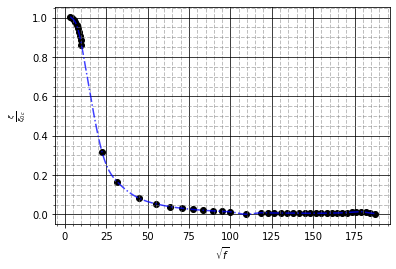

In [29]:

# построим график эксперементально полученного отношения амплитуд
fig6, ax6 = PythonGraphMod.CreateSimpleGraph()
# введем соответствующую функцию
def kxi_kxi0(kxi):
    return kxi/kxi0

# для удобства заведем массив значений по оси y
kxi_kxi0_arr = kxi_kxi0(kxi_region)

# заводим массивы значений для апроксимации криволинейной зависимости
sqrt_hf_dence, kkxi_dence = PythonGraphMod.InterpolateSet(sqrt_f, kxi_kxi0_arr, 'cubic', 3.2, 187)

# нанесем на график эксперементальные точки и апроксимирующую кривую
ax6.scatter(sqrt_f, kxi_kxi0_arr, c = 'black', marker = 'o')
ax6.plot(sqrt_hf_dence, kkxi_dence, color='blue', alpha=.75, lw=1.5, ls='-.')

# сетка
ax6.minorticks_on()
ax6.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax6.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
plt.ylabel(r'$\frac{\xi}{\xi_{0c}}$')
plt.xlabel(r'$\sqrt{f}$')
plt.show()

fig6.savefig("../images/xi_xi0(sqrt).pdf")

Полученное соотношение $$\frac{\xi_{0c}}{\xi_0}$$ даст нам эксперементальную зависимость $$\frac{|H_{0c}|}{|H_0|}$$ кроме того, можно получить теоретическую зависимость, используя формулу $$H_1 = \frac{H_0}{\ch{k h} + 0.5 k a \sh{k h}}$$ где $$k = \frac{1 + i}{\delta}$$

Стоит воспользоваться приближением при низких и высоких частотах. При низких частотах выражение приближается формулой $$\frac{|H_1|}{|H_0|} = \frac{1}{\sqrt{1 + \frac{1}{4} (2 \pi a h \sigma \mu_0 \nu)^2}}$$

При высоких частотах $$\frac{|H_1|}{|H_0|} = \frac{2 \sqrt{2} \delta}{a} e^{-\frac{h}{\delta}}$$

In [30]:
# зададим функции, апроксимируещие отношение амплитуд на высоких и низких частотах (смотри выкладки выше)
# на низких частотах
def low_H(f):
    A = 1/4 * (2*pi*a*h*sigma*mu0*f)*(2*pi*a*h*sigma*mu0*f)
    return 1/(np.sqrt(1 + A))

# на высоких частотах
def hight_H(f):
    return (2*math.sqrt(2)*delta(f)/a)*np.exp(-h/delta(f))
    
# заведем переменные -- параметры установки
a = 0.0225 # meters
h = 0.0015 # meters
sigma = 5.178e7
mu0 = 12.57e-7
pi = math.pi

# функция задающая глубину проникновения паля, по заданной частоте
def delta(f):
    return np.sqrt(2/(pi*mu0*sigma*f))
# функция, задающая k (смотри выкладки выше)
def k(f):
    return (1 + 1j)/delta(f)

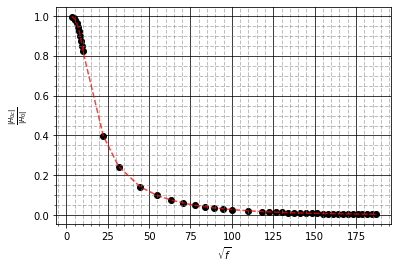

In [31]:
# построим график отношения амплитуд согласно теории
fig7, ax7 = PythonGraphMod.CreateSimpleGraph()

# массив значений (отношения амплитуд) на всей области частот
theory_val = np.concatenate((low_H(low_f), hight_H(hight_f[1:])), axis=0, out=None, dtype=None)

# нанесем на график эксперементальные точки и проведем апроксимирующую кривую
ax7.scatter(sqrt_f, theory_val, c = 'black', marker = 'o')
plt.plot(sqrt_f, theory_val, color='red', alpha=.75, lw=1.5, ls='--')

# сетка
ax7.minorticks_on()
ax7.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax7.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
plt.ylabel(r'$\frac{|H_{0c}|}{|H_0|}$')
plt.xlabel(r'$\sqrt{f}$')
plt.show()

fig7.savefig("../images/H_H0(sqrt).pdf")

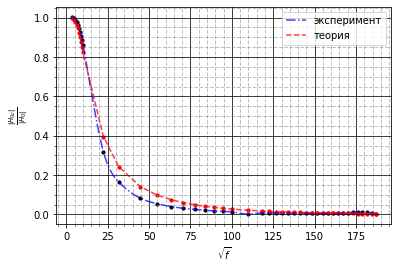

In [32]:
# построим на одном графике зависимости отношения амплитуд от корня из частоты,
# полученные эксперементальным и теоретическим путем
fig8, ax8 = PythonGraphMod.CreateSimpleGraph()

# нанесем на график эксперементальные точки и проведем апроксимирующие кривые
# эксперементальная зависимость
ax8.scatter(sqrt_f, kxi_kxi0_arr, c = 'black', marker = 'o', s = 10)
ax8.plot(sqrt_hf_dence, kkxi_dence, color='blue', alpha=.75, lw=1.5, ls='-.', label='эксперимент')
# теоретическая зависимость
ax8.scatter(sqrt_f, theory_val, c = 'red', marker = 'o', s = 10)
plt.plot(sqrt_f, theory_val, color='red', alpha=.75, lw=1.5, ls='--', label='теория')

# сетка
ax8.minorticks_on()
ax8.grid(which = 'major', color = 'black', linewidth = 1, linestyle = '-', alpha = 0.75)
ax8.grid(which = 'minor', color = 'grey', linewidth = 1, linestyle = '--', alpha = 0.5)

# оформление
plt.ylabel(r'$\frac{|H_{0c}|}{|H_0|}$')
plt.xlabel(r'$\sqrt{f}$')
plt.legend(loc="upper right")
plt.show()

fig8.savefig("../images/exp_th(sqrt).pdf")